# Importing the required packages

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('ggplot')

In [34]:
df = pd.read_csv(r"C:\Users\sumit.p.kumar.singh\OneDrive - Accenture\kaggle\insurance.csv")
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Injury_type,fraud_reported
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,Neck injury,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,Concussion,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,Shoulder injury,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,Head injury,N
999,456,60,556080,11/11/1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,Back Pain,N


# Exploratory Data Analysis

### Missing data

<AxesSubplot:>

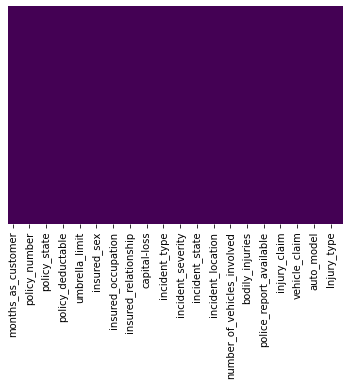

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
df.isnull().sum().sort_values(ascending=False)

fraud_reported                 0
Injury_type                    0
incident_date                  0
capital-loss                   0
capital-gains                  0
insured_relationship           0
insured_hobbies                0
insured_occupation             0
insured_education_level        0
insured_sex                    0
insured_zip                    0
umbrella_limit                 0
policy_annual_premium          0
policy_deductable              0
policy_csl                     0
policy_state                   0
policy_bind_date               0
policy_number                  0
age                            0
incident_type                  0
collision_type                 0
incident_severity              0
police_report_available        0
auto_year                      0
auto_model                     0
auto_make                      0
vehicle_claim                  0
property_claim                 0
injury_claim                   0
total_claim_amount             0
witnesses 

###### it is evident for the heatmap we don't have any missing data 

### Distribution of the Fraud

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

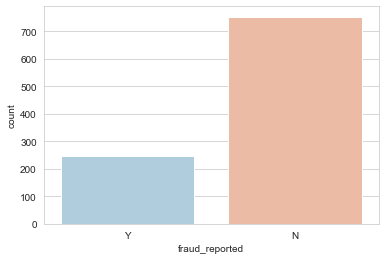

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='fraud_reported',data=df,palette='RdBu_r')

#### Distribution of fraudlent and non fraudlent claims looks good data doesn't seems to be baised towards a single type of claims 

### Distribution of Fraud among Sex 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

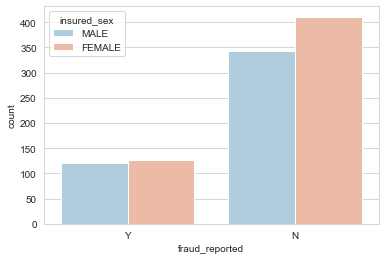

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='fraud_reported',hue='insured_sex',data=df,palette='RdBu_r')

#### It is clearly evident that data is not baised any of the single sex 

### Distribution of frauds as per injury type

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

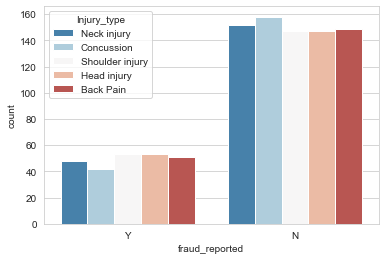

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='fraud_reported',hue='Injury_type',data=df,palette='RdBu_r')

### Frequency of claims among various age group 

#### Data is normally distributed among various types of injuries

<AxesSubplot:>

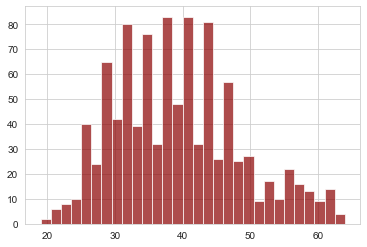

In [13]:
df['age'].hist(bins=30,color='darkred',alpha=0.7)

### Distribution of claim amount 

#### We can see very high peaks in the age group 30-50 it means they people are having high number of claim requests 

<AxesSubplot:>

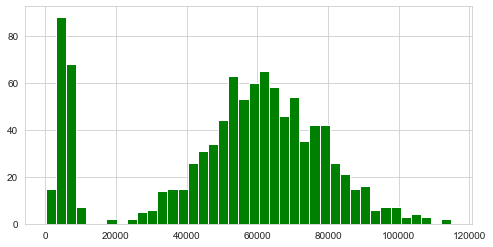

In [17]:
df['total_claim_amount'].hist(color='green',bins=40,figsize=(8,4))

# Converting the categorical features 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [36]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'Injury_type', 'fraud_reported']


In [37]:
df_num=df[numeric_var_names]
df_num.head(5)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [38]:
df_cat=df[cat_var_names]
df_cat.head(5)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,Injury_type,fraud_reported
0,10/17/2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,1/25/2015,Single Vehicle Collision,...,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Neck injury,Y
1,6/27/2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,1/21/2015,Vehicle Theft,...,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Concussion,Y
2,9/6/2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2/22/2015,Multi-vehicle Collision,...,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,Shoulder injury,N
3,5/25/1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,1/10/2015,Single Vehicle Collision,...,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Head injury,Y
4,6/6/2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2/17/2015,Vehicle Theft,...,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,Back Pain,N


In [138]:
policy_number = df['policy_number']
df_cat_var = df.apply(LabelEncoder().fit_transform)
df_cat_var.drop(['policy_bind_date','incident_date','age','vehicle_claim','umbrella_limit','policy_number'],axis=1,inplace=True)
df_cat_var

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,Injury_type,fraud_reported
0,299,2,1,1,732,486,1,4,2,17,...,2,2,563,258,512,10,1,9,3,1
1,212,1,1,2,396,519,1,4,6,15,...,0,0,44,46,45,8,12,12,1,1
2,123,2,0,2,740,6,0,6,11,2,...,3,1,143,337,104,4,30,12,4,0
3,239,0,1,2,743,812,0,6,1,2,...,2,1,451,245,249,3,34,19,2,1
4,212,0,2,1,902,850,1,0,11,2,...,1,1,81,70,36,0,31,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,2,1,577,19,0,5,2,13,...,1,0,705,624,379,6,6,11,3,0
996,266,0,0,1,765,813,0,6,9,17,...,3,0,760,630,608,13,28,20,1,0
997,119,2,1,0,691,181,0,5,1,3,...,3,2,507,324,330,11,19,1,4,0
998,377,0,2,2,652,157,1,0,5,0,...,1,2,224,168,170,1,5,3,2,0


In [139]:
pandas_profiling.ProfileReport(df_num)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,18
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,140.8 KiB
Average record size in memory,144.1 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,2


### Applying PCA for the dimesionality reduction

In [141]:
X = df_cat_var.values

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [142]:
X_scaled

array([[ 1.14895094,  1.18717314,  0.06093665, ..., -0.1834404 ,
         0.70710678,  1.74601919],
       [ 0.2776003 , -0.01685641,  0.06093665, ...,  0.31549088,
        -0.70710678,  1.74601919],
       [-0.6137814 ,  1.18717314, -1.18266843, ...,  0.31549088,
         1.41421356, -0.57273139],
       ...,
       [-0.65384349,  1.18717314,  0.06093665, ..., -1.5139238 ,
         1.41421356, -0.57273139],
       [ 1.93016186, -1.22088596,  1.30454172, ..., -1.18130295,
         0.        , -0.57273139],
       [ 1.92014633,  1.18717314,  0.06093665, ...,  0.31549088,
        -1.41421356, -0.57273139]])

In [143]:
pca_35 = PCA(n_components = 34, random_state=2020)
pca_35.fit(X_scaled)
X_pca_35 = pca_35.transform(X_scaled)

In [144]:
print("Variance explained by the all 30 principal components = ",
      sum(pca_35.explained_variance_ratio_*100))

Variance explained by the all 30 principal components =  99.99999999999996


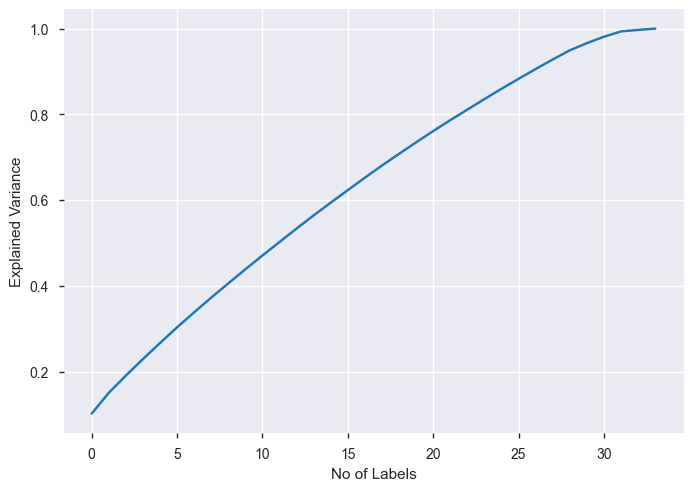

In [145]:
plt.plot(np.cumsum(pca_35.explained_variance_ratio_))
plt.xlabel("No of Labels")
plt.ylabel("Explained Variance")
plt.savefig('elbow_plot.png',dpi=100)

In [153]:
print("Variance explained by First Principal Component = ",
      np.cumsum(pca_35.explained_variance_ratio_*100)[0])

print("Variance explained by Second Principal Component = ",
      np.cumsum(pca_35.explained_variance_ratio_*100)[1])

print("Variance explained by Third Principal Component = ",
      np.cumsum(pca_35.explained_variance_ratio_*100)[2])

print("Variance explained by Fourth Principal Component = ",
      np.cumsum(pca_35.explained_variance_ratio_*100)[3])

print("Variance explained by Fifth Principal Component = ",
      np.cumsum(pca_35.explained_variance_ratio_*100)[4])

print("Variance explained by tenth Principal Component = ",
      np.cumsum(pca_35.explained_variance_ratio_*100)[9])

print("Variance explained by fifteen Principal Component = ",
      np.cumsum(pca_35.explained_variance_ratio_*100)[18])

Variance explained by First Principal Component =  10.284845804025213
Variance explained by Second Principal Component =  15.131478489036482
Variance explained by Third Principal Component =  19.137074279268305
Variance explained by Fourth Principal Component =  22.99065060882709
Variance explained by Fifth Principal Component =  26.73716361688094
Variance explained by tenth Principal Component =  43.92643553624858
Variance explained by fifteen Principal Component =  70.8304706700061


In [161]:
for i in range(1,34):
    print("Variance explained by",i,
      np.cumsum(pca_35.explained_variance_ratio_*100)[i])

Variance explained by 1 15.131478489036482
Variance explained by 2 19.137074279268305
Variance explained by 3 22.99065060882709
Variance explained by 4 26.73716361688094
Variance explained by 5 30.401007484728282
Variance explained by 6 33.893067532124356
Variance explained by 7 37.320638683432364
Variance explained by 8 40.64008381758613
Variance explained by 9 43.92643553624858
Variance explained by 10 47.13499008421421
Variance explained by 11 50.28587410136643
Variance explained by 12 53.4176601745794
Variance explained by 13 56.493446640178306
Variance explained by 14 59.461624384250285
Variance explained by 15 62.37986509682594
Variance explained by 16 65.27956370394351
Variance explained by 17 68.10252249173926
Variance explained by 18 70.8304706700061
Variance explained by 19 73.51077443525533
Variance explained by 20 76.13825366052276
Variance explained by 21 78.67612108852668
Variance explained by 22 81.14323632346019
Variance explained by 23 83.5955466053473
Variance explain

In [147]:
label = df_cat_var['fraud_reported']

In [261]:
pca_80 = PCA(n_components = 0.80, random_state=2020)
pca_80.fit(X_scaled)
X_pca_80= pca_80.transform(X_scaled)

In [262]:
X_pca_80.shape

(1000, 23)

<AxesSubplot:>

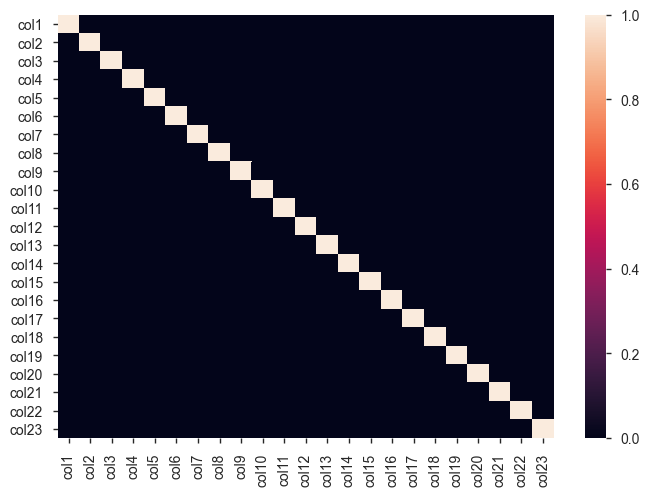

In [264]:
sns.heatmap(df_new.corr())

### Boruta to further reduce the dimensonality of data 

In [296]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [363]:
X = X_pca_80
Y = label

In [303]:
rf_model= RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [304]:
feat_selector = BorutaPy(rf_model, n_estimators='auto', verbose=2, random_state=1)

In [364]:
feat_selector.fit(X, Y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	10


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=97, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x20BC9BAE598,
                                          verbose=0, warm_start=Fa

In [310]:
# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

In [316]:
feature_ranks = list(zip(df_new.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: col1                      Rank: 1,  Keep: True
Feature: col2                      Rank: 1,  Keep: True
Feature: col3                      Rank: 1,  Keep: True
Feature: col4                      Rank: 8,  Keep: False
Feature: col5                      Rank: 1,  Keep: True
Feature: col6                      Rank: 1,  Keep: True
Feature: col7                      Rank: 1,  Keep: True
Feature: col8                      Rank: 13,  Keep: False
Feature: col9                      Rank: 4,  Keep: False
Feature: col10                     Rank: 2,  Keep: False
Feature: col11                     Rank: 1,  Keep: True
Feature: col12                     Rank: 1,  Keep: True
Feature: col13                     Rank: 6,  Keep: False
Feature: col14                     Rank: 11,  Keep: False
Feature: col15                     Rank: 3,  Keep: False
Feature: col16                     Rank: 6,  Keep: False
Feature: col17                     Rank: 9,  Keep: False
Feature: col18                     Ra

In [320]:
 X_transformed = feat_selector.transform(np.array(X))

In [321]:
X_transformed.shape

(1000, 11)

In [322]:
df_new = pd.DataFrame(X_transformed, columns = ['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10',
                                  'col11'])
df_new

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11
0,-1.054215,-1.810054,0.261851,1.027610,2.261553,-0.082265,1.921831,0.445266,0.416438,-0.396670,-0.210561
1,3.084162,-0.537697,-0.833165,0.254080,1.308517,-1.403080,1.136104,1.302718,0.228645,0.367986,1.155151
2,0.105772,1.437257,-0.759060,-1.060949,-0.147519,0.835351,0.030768,-0.116324,-0.522400,0.671180,-0.976089
3,0.247163,-1.178376,-2.313265,-1.706581,2.191212,1.205320,0.578558,-0.722550,-1.245544,1.161757,0.032249
4,2.773774,-0.366093,-1.839149,-0.354555,-1.222597,0.849194,0.451741,-1.665594,-0.302507,-0.131568,-0.795903
...,...,...,...,...,...,...,...,...,...,...,...
995,-1.074877,-2.015782,1.105440,0.609438,-1.055730,0.014423,-0.514242,0.590429,1.600753,1.079073,-0.050487
996,-2.767317,-2.339115,0.558487,0.552506,0.412102,0.977507,-2.232578,-0.901594,-0.299850,-0.942956,-2.175457
997,-1.125506,0.933632,-0.193227,-0.635276,0.414402,0.008008,0.521240,-0.734559,0.741012,0.335591,-1.258008
998,1.385298,-0.694263,-2.041105,-2.010059,-1.666580,-1.461253,1.785511,-1.351292,0.346015,0.997046,0.592294


### Divinding data into Train and Test

In [323]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df_new, label, test_size = 0.3, random_state = 0)

# Training & Predicting

### Logistic Regression

In [324]:
from sklearn.linear_model import LogisticRegression

In [325]:
logmodel = LogisticRegression()
logmodel.fit(xTrain,yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [326]:
predictions = logmodel.predict(xTest)
xTest.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11
993,-0.609796,2.260327,-0.007387,-0.938482,-0.562469,-0.531419,-0.496735,1.084286,1.481051,0.580219,-0.423595
859,-0.403755,1.942454,0.487446,-1.463966,0.153446,0.003307,1.388776,-1.311267,0.961185,0.019838,-0.533352
298,2.708119,0.483525,0.812216,1.738773,-0.163099,-0.361909,1.663828,-0.318433,0.318652,0.726687,1.049811
553,3.034155,0.202188,-1.390241,-0.285045,-2.874452,1.342216,-0.824965,1.266787,-1.072544,-1.604501,-0.130773
672,0.493650,1.863295,0.355375,1.911316,-0.023345,-0.162808,-0.308879,-0.261708,-1.190835,0.992327,2.238397


### Evaluting this model

In [327]:
from sklearn.metrics import classification_report,confusion_matrix

In [328]:
print(confusion_matrix(yTest,predictions))

[[222   1]
 [  4  73]]


In [329]:
accuracy_df = pd.DataFrame(yTest)
accuracy_df['label_pred'] = predictions
accuracy_df

,fraud_reported,label_pred
993,0,0
859,0,0
298,0,0
553,0,0
672,0,0
...,...,...
167,0,0
998,0,1
984,0,0
491,0,0


In [330]:
print(classification_report(yTest,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       223
           1       0.99      0.95      0.97        77

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300



### Cross Validate the Score 

In [331]:
from sklearn.model_selection import cross_val_score

In [332]:
scores = cross_val_score(logmodel, xTrain,yTrain, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.95       0.96428571 0.95714286 0.95714286 0.97857143]


In [333]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.95, 0.9614285714285714, 0.9785714285714285)

#### Mean accuracy after crossfold validation is 0.96

### Decision Tree Classifiction

In [334]:
from sklearn.tree import DecisionTreeClassifier

In [335]:
dt_model=DecisionTreeClassifier()
dt_model.fit(xTrain,yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [336]:
dt_pred = dt_model.predict(xTest)

In [337]:
print(confusion_matrix(yTest,dt_pred))

[[207  16]
 [ 15  62]]


In [338]:
print(classification_report(yTest,dt_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       223
           1       0.79      0.81      0.80        77

    accuracy                           0.90       300
   macro avg       0.86      0.87      0.87       300
weighted avg       0.90      0.90      0.90       300



### Cross Validate the Score 

In [339]:
scores = cross_val_score(dt_model, xTrain,yTrain, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.86428571 0.9        0.90714286 0.87857143 0.91428571]


In [340]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8642857142857143, 0.8928571428571429, 0.9142857142857143)

### The mean accuracy is 89% in case of decision Tree

### Random Forest Classification

In [341]:
from sklearn.ensemble import RandomForestClassifier

In [342]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [343]:
rf_pre=rf.predict(xTest)

In [344]:
print(confusion_matrix(yTest,rf_pre))

[[219   4]
 [  8  69]]


In [345]:
print(classification_report(yTest,rf_pre))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       223
           1       0.95      0.90      0.92        77

    accuracy                           0.96       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.96      0.96      0.96       300



### Cross Validate the Score 

In [346]:
scores = cross_val_score(rf, xTrain,yTrain, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.9        0.92142857 0.95       0.94285714 0.96428571]


In [347]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9, 0.9357142857142857, 0.9642857142857143)

### The mean accuracy is 93% in case of decision Tree

### XGBoosts Classifier

In [348]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(xTrain,yTrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [349]:
xg_pred = xgboost.predict(xTest)

In [350]:
print(confusion_matrix(yTest,xg_pred))

[[215   8]
 [  8  69]]


In [351]:
print(classification_report(yTest,xg_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       223
           1       0.90      0.90      0.90        77

    accuracy                           0.95       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.95      0.95      0.95       300



### Cross Validate the Score 

In [352]:
scores = cross_val_score(xgboost, xTrain,yTrain, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.89285714 0.92857143 0.94285714 0.93571429 0.95714286]


In [353]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8928571428571429, 0.9314285714285715, 0.9571428571428572)

### The mean accuracy is 93% in case of decision Tree

In [354]:
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [357]:
ann  = Sequential()
ann.add(Dense(units= 32,init= 'uniform', activation = 'relu', input_dim=11))
ann.add(Dense(units= 32,init= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,init= 'uniform', activation = 'sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=11, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [358]:
ann.fit(xTrain,yTrain, batch_size=32, nb_epoch=300,verbose= 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


In [359]:
ann_pred = ann.predict(xTest)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]


In [360]:
print(confusion_matrix(yTest,ann_pred))

[[216   7]
 [  4  73]]


In [361]:
print(classification_report(yTest,ann_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       223
           1       0.91      0.95      0.93        77

    accuracy                           0.96       300
   macro avg       0.95      0.96      0.95       300
weighted avg       0.96      0.96      0.96       300



#### Accuracy in case of ANN is 96% 